In [1]:
import os 
import _pickle as pkl
import numpy as np
import matplotlib.pylab as plt
import cv2 
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential,Model
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D,Dense, Dropout, Activation, Flatten,BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.utils.np_utils import to_categorical
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore')

Using TensorFlow backend.


# Question 2a

In [2]:
def get_data(num_classes):
    # Data split ,test and train
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    print('x_train shape:', x_train.shape)
    print('x_test shape:', x_test.shape)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255
    # 
    y_train = to_categorical(y_train, num_classes)
    y_test = to_categorical(y_test, num_classes)
    
    return x_train, y_train, x_test, y_test

num_classes = 10
x_train, y_train, x_test, y_test = get_data(num_classes)

x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)


In [3]:
def create_model1(input_shape,lr,decay):
    model = Sequential()
    model.add(Conv2D(16, kernel_size=3, strides=1, padding="same", activation="relu", input_shape=input_shape))
    model.add(Conv2D(16, kernel_size=3, strides=1, padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=2, strides=2))
    model.add(Conv2D(32, kernel_size=3, strides=1, padding="same", activation="relu"))
    model.add(Conv2D(32, kernel_size=3, strides=1, padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=2, strides=2))
    model.add(Conv2D(64, kernel_size=3, strides=1, padding="same", activation="relu"))
    model.add(Conv2D(64, kernel_size=3, strides=1, padding="same", activation="relu"))
    model.add(MaxPooling2D(pool_size=2, strides=2))
    model.add(Conv2D(128, kernel_size=3, strides=1, padding="same", activation="relu"))
    model.add(Conv2D(128, kernel_size=3, strides=1, padding="same", activation="relu"))
    model.add(AveragePooling2D(strides=4, padding = "same"))
    model.add(Flatten())
    model.add(Dense(10, activation = "softmax"))
    model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=lr,decay=decay),metrics=['accuracy'])
    return model
            
lr=0.001
decay=1e-6
input_shape=x_train.shape[1:]
model1=create_model1(input_shape,lr,decay)
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 64)         

In [4]:
data_gen = ImageDataGenerator(
#         rotation_range=30,  # Rotated Image
        # Horizontal moving image (percentage of total width)
        width_shift_range=0.1,
        # Vertical moving image (percentage of total height)
        height_shift_range=0.1,
        horizontal_flip=True,  # Flip image horizontally
#         vertical_flip=True,  # Flip image vertically
        )



batch_size = 500
epochs = 50
save_dir = './model1'
if not os.path.exists(save_dir):
    os.mkdir(save_dir)
save_filepath = os.path.join(save_dir,'epoch{epoch:02d}_acc{val_accuracy:.2f}.hdf5')
save_callback = ModelCheckpoint(filepath=save_filepath,monitor='val_accuracy',verbose=1,save_best_only=True,save_weights_only=True,mode='max')
history_callback1 = model1.fit_generator(data_gen.flow(x_train, y_train,batch_size=batch_size),
                               epochs=epochs,validation_data=(x_test, y_test), verbose=1,callbacks=[save_callback])

Epoch 1/50
100/100 [==============================] - 55s 548ms/step - loss: 1.9942 - accuracy: 0.2526 - val_loss: 1.7334 - val_accuracy: 0.3419

Epoch 00001: val_accuracy improved from -inf to 0.34190, saving model to ./model1\epoch01_acc0.34.hdf5
Epoch 2/50
100/100 [==============================] - 44s 443ms/step - loss: 1.6582 - accuracy: 0.3832 - val_loss: 1.5300 - val_accuracy: 0.4409

Epoch 00002: val_accuracy improved from 0.34190 to 0.44090, saving model to ./model1\epoch02_acc0.44.hdf5
Epoch 3/50
100/100 [==============================] - 43s 430ms/step - loss: 1.5065 - accuracy: 0.4460 - val_loss: 1.4538 - val_accuracy: 0.4668

Epoch 00003: val_accuracy improved from 0.44090 to 0.46680, saving model to ./model1\epoch03_acc0.47.hdf5
Epoch 4/50
100/100 [==============================] - 43s 431ms/step - loss: 1.4005 - accuracy: 0.4883 - val_loss: 1.3018 - val_accuracy: 0.5287

Epoch 00004: val_accuracy improved from 0.46680 to 0.52870, saving model to ./model1\epoch04_acc0.53.

100/100 [==============================] - 44s 437ms/step - loss: 0.5567 - accuracy: 0.8042 - val_loss: 0.7020 - val_accuracy: 0.7716

Epoch 00035: val_accuracy did not improve from 0.78840
Epoch 36/50
100/100 [==============================] - 44s 435ms/step - loss: 0.5514 - accuracy: 0.8076 - val_loss: 0.6215 - val_accuracy: 0.7897

Epoch 00036: val_accuracy improved from 0.78840 to 0.78970, saving model to ./model1\epoch36_acc0.79.hdf5
Epoch 37/50
100/100 [==============================] - 44s 441ms/step - loss: 0.5367 - accuracy: 0.8121 - val_loss: 0.5908 - val_accuracy: 0.7964

Epoch 00037: val_accuracy improved from 0.78970 to 0.79640, saving model to ./model1\epoch37_acc0.80.hdf5
Epoch 38/50
100/100 [==============================] - 43s 431ms/step - loss: 0.5370 - accuracy: 0.8120 - val_loss: 0.6159 - val_accuracy: 0.7921

Epoch 00038: val_accuracy did not improve from 0.79640
Epoch 39/50
100/100 [==============================] - 44s 435ms/step - loss: 0.5214 - accuracy: 0.816

In [5]:
model_filepath = os.path.join(save_dir,'epoch49_acc0.82.hdf5')
model1.load_weights(model_filepath)
acc = model1.evaluate(x_test, y_test, verbose=1)[1]
print('Test Accuracy:', acc)

10000/10000 [==============================] - 6s 624us/step
Test Accuracy: 0.8192999958992004


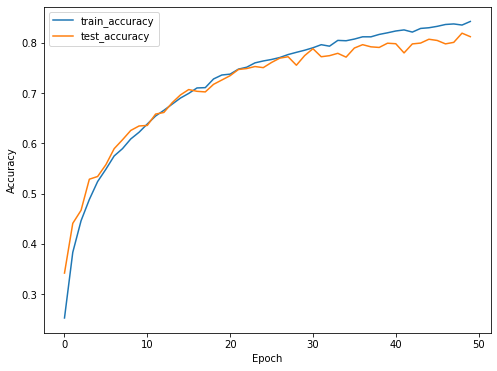

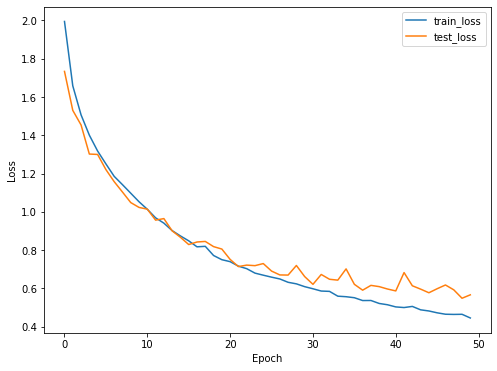

In [6]:
# Plot training and test accuracy in each epoch.
fig, ax = plt.subplots(1, figsize=(8, 6))

train_accuracy = history_callback1.history['accuracy']
test_accuracy = history_callback1.history['val_accuracy']
ax.plot(train_accuracy, label='train_accuracy')
ax.plot(test_accuracy, label='test_accuracy')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
plt.legend()
plt.show()

# Plot training and test loss in each epoch.
fig, ax = plt.subplots(1, figsize=(8, 6))

train_loss = history_callback1.history['loss']
test_loss = history_callback1.history['val_loss']
ax.plot(train_loss, label='train_loss')
ax.plot(test_loss, label='test_loss')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
plt.legend()
plt.show()

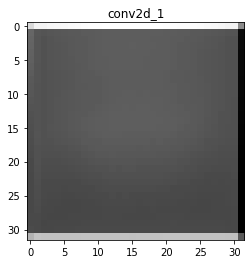

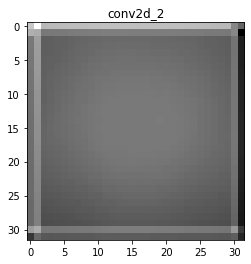

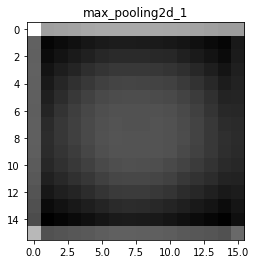

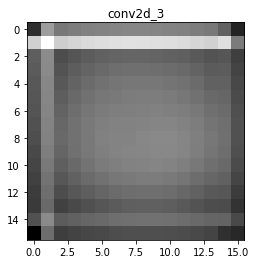

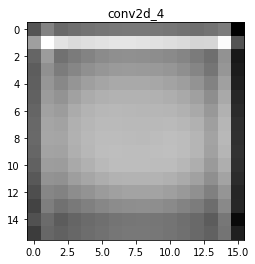

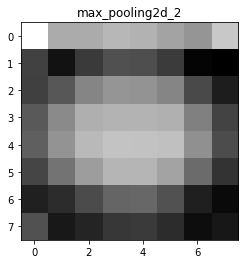

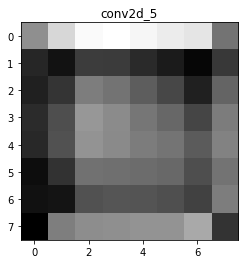

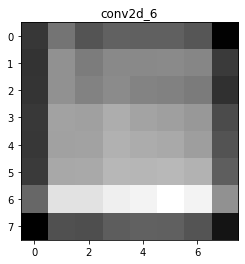

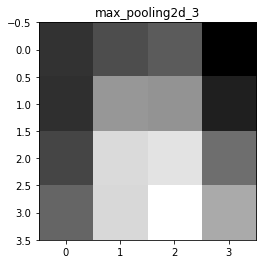

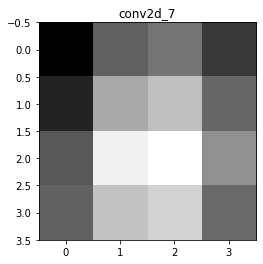

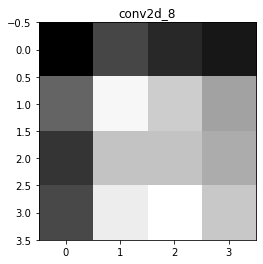

In [7]:
activation_layers = Model(inputs=model1.inputs, outputs=[layer.output for layer in model1.layers])
activations = activation_layers.predict(x_train)
for i,activation in enumerate(activations[:11]):
    layer_names = model1.layers[i].name
    # Compute the average absolute values of activations average across all train data and channels for each layer
    avg_abs_activation=abs(np.mean(activation,(0,-1)))
    # normalise averaged activations to make them between [0,1]
    avg_abs_activation=(avg_abs_activation-avg_abs_activation.min())/(avg_abs_activation.max()-avg_abs_activation.min())
    plt.gray()
    plt.imshow(avg_abs_activation)
    plt.title(layer_names)
    plt.show()

In [7]:
#

# Question 2b

In [8]:
def create_model2(input_shape,lr,decay):
    model = Sequential()
    model.add(Conv2D(16, kernel_size=3, strides=1, padding="same", activation="relu", input_shape=input_shape))
    model.add(BatchNormalization(momentum=0.1,epsilon=0.00001))# trainable=Falsei.e. non learning batch norm
    model.add(Conv2D(16, kernel_size=3, strides=1, padding="same", activation="relu"))
    model.add(BatchNormalization(momentum=0.1,epsilon=0.00001))
    model.add(MaxPooling2D(pool_size=2, strides=2))
    model.add(Conv2D(32, kernel_size=3, strides=1, padding="same", activation="relu"))
    model.add(BatchNormalization(momentum=0.1,epsilon=0.00001))
    model.add(Conv2D(32, kernel_size=3, strides=1, padding="same", activation="relu"))
    model.add(BatchNormalization(momentum=0.1,epsilon=0.00001))
    model.add(MaxPooling2D(pool_size=2, strides=2))
    model.add(Conv2D(64, kernel_size=3, strides=1, padding="same", activation="relu"))
    model.add(BatchNormalization(momentum=0.1,epsilon=0.00001))
    model.add(Conv2D(64, kernel_size=3, strides=1, padding="same", activation="relu"))
    model.add(BatchNormalization(momentum=0.1,epsilon=0.00001))
    model.add(MaxPooling2D(pool_size=2, strides=2))
    model.add(Conv2D(128, kernel_size=3, strides=1, padding="same", activation="relu"))
    model.add(BatchNormalization(momentum=0.1,epsilon=0.00001))
    model.add(Conv2D(128, kernel_size=3, strides=1, padding="same", activation="relu"))
    model.add(BatchNormalization(momentum=0.1,epsilon=0.00001))
    model.add(AveragePooling2D(strides=4, padding = "same"))
    model.add(Flatten())
    model.add(Dense(10, activation = "softmax"))
    model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=lr,decay=decay),metrics=['accuracy'])
    return model
            
lr=0.001
decay=1e-6
input_shape=x_train.shape[1:]
model2=create_model2(input_shape,lr,decay)
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 16)        64        
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 16)        2320      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 16)        64        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 32)        4640      
_________________________________________________________________
batch_normalization_3 (Batch (None, 16, 16, 32)       

In [9]:
data_gen = ImageDataGenerator(
#         rotation_range=30,  
        
        width_shift_range=0.1,
       
        height_shift_range=0.1,
        horizontal_flip=True,  
#         vertical_flip=True, 
        )

batch_size = 500
epochs = 20
save_dir = './model2'
if not os.path.exists(save_dir):
    os.mkdir(save_dir)
save_filepath = os.path.join(save_dir,'epoch{epoch:02d}_acc{val_accuracy:.2f}.hdf5')
save_callback = ModelCheckpoint(filepath=save_filepath,monitor='val_accuracy',verbose=1,save_best_only=True,save_weights_only=True,mode='max')
history_callback2 = model2.fit_generator(data_gen.flow(x_train, y_train,batch_size=batch_size),
                               epochs=epochs,validation_data=(x_test, y_test), verbose=1,callbacks=[save_callback])

Epoch 1/20
100/100 [==============================] - 119s 1s/step - loss: 1.4800 - accuracy: 0.4628 - val_loss: 1.1909 - val_accuracy: 0.5697

Epoch 00001: val_accuracy improved from -inf to 0.56970, saving model to ./model2\epoch01_acc0.57.hdf5
Epoch 2/20
100/100 [==============================] - 110s 1s/step - loss: 1.0864 - accuracy: 0.6104 - val_loss: 1.0122 - val_accuracy: 0.6431

Epoch 00002: val_accuracy improved from 0.56970 to 0.64310, saving model to ./model2\epoch02_acc0.64.hdf5
Epoch 3/20
100/100 [==============================] - 110s 1s/step - loss: 0.9126 - accuracy: 0.6779 - val_loss: 0.8637 - val_accuracy: 0.6961

Epoch 00003: val_accuracy improved from 0.64310 to 0.69610, saving model to ./model2\epoch03_acc0.70.hdf5
Epoch 4/20
100/100 [==============================] - 110s 1s/step - loss: 0.8097 - accuracy: 0.7148 - val_loss: 0.8095 - val_accuracy: 0.7170

Epoch 00004: val_accuracy improved from 0.69610 to 0.71700, saving model to ./model2\epoch04_acc0.72.hdf5
Epo

In [11]:
model_filepath = os.path.join(save_dir,'epoch20_acc0.82.hdf5')
model2.load_weights(model_filepath)
acc = model2.evaluate(x_test, y_test, verbose=1)[1]
print('Test Accuracy:', acc)

10000/10000 [==============================] - 7s 712us/step
Test Accuracy: 0.8238000273704529


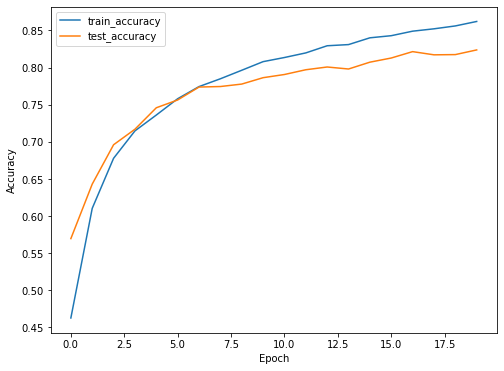

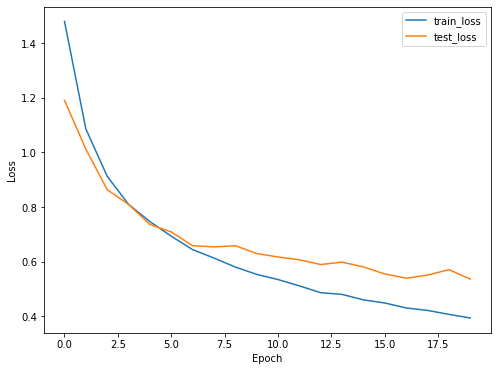

In [12]:
# Plot training and test accuracy in each epoch.
fig, ax = plt.subplots(1, figsize=(8, 6))

train_accuracy = history_callback2.history['accuracy']
test_accuracy = history_callback2.history['val_accuracy']
ax.plot(train_accuracy, label='train_accuracy')
ax.plot(test_accuracy, label='test_accuracy')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
plt.legend()
plt.show()

# Plot training and test loss in each epoch.
fig, ax = plt.subplots(1, figsize=(8, 6))

train_loss = history_callback2.history['loss']
test_loss = history_callback2.history['val_loss']
ax.plot(train_loss, label='train_loss')
ax.plot(test_loss, label='test_loss')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
plt.legend()
plt.show()

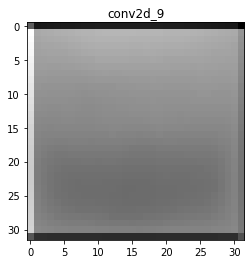

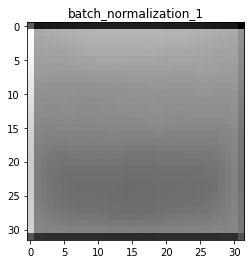

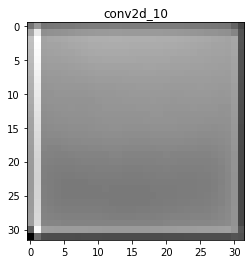

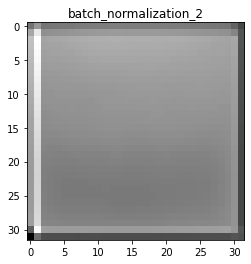

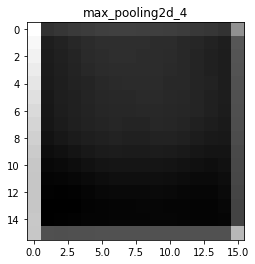

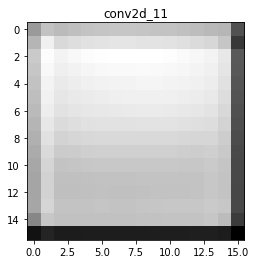

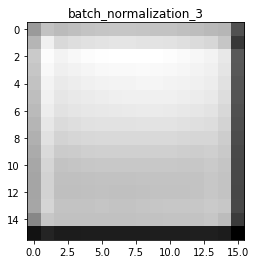

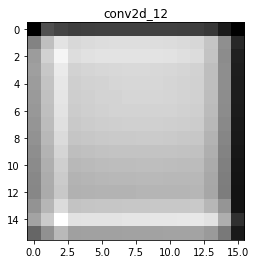

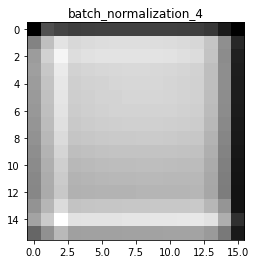

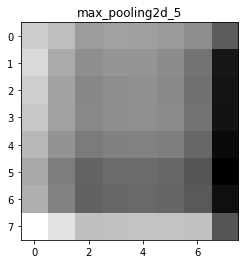

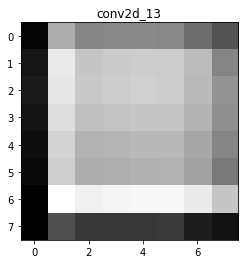

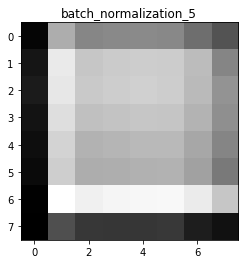

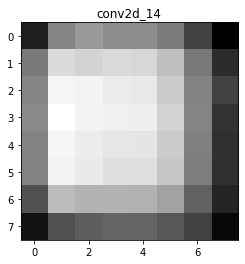

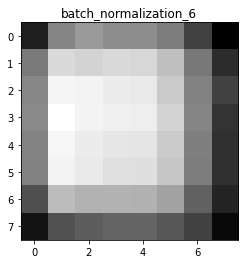

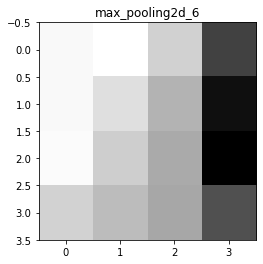

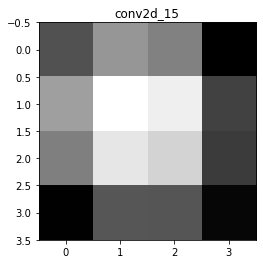

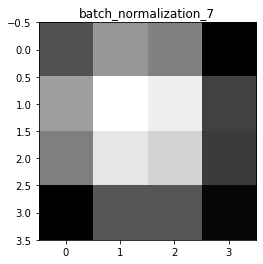

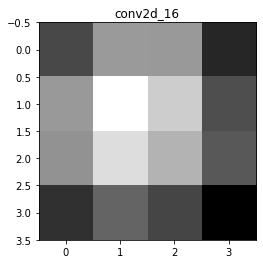

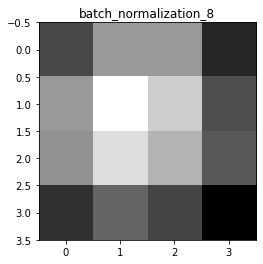

In [21]:
activation_layers = Model(inputs=model2.inputs, outputs=[layer.output for layer in model2.layers])
activations = activation_layers.predict(x_train)
for i,activation in enumerate(activations[:19]):
    layer_names = model2.layers[i].name
    # Compute the average absolute values of activations average across all train data and channels for each layer
    avg_abs_activation=abs(np.mean(activation,(0,-1)))
    # normalise averaged activations to make them between [0,1]
    avg_abs_activation=(avg_abs_activation-avg_abs_activation.min())/(avg_abs_activation.max()-avg_abs_activation.min())
    plt.gray()
    plt.imshow(avg_abs_activation)
    plt.title(layer_names)
    plt.show()